# Introduction

In this lab, you will learn how to implement different regularization strategies for Gradient Boosting using scikit-learn. Regularization is a technique that helps prevent overfitting, which is a common problem in machine learning models. We will use the binomial deviance loss function and the make_hastie_10_2 dataset for this lab.

# Import Libraries

Let's start by importing the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

# Load and Split Data

We will use the make_hastie_10_2 dataset and split it into training and testing sets.

In [2]:
X, y = datasets.make_hastie_10_2(n_samples=4000, random_state=1)

# map labels from {-1, 1} to {0, 1}
labels, y = np.unique(y, return_inverse=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

# Define Parameters

We will define the parameters for our Gradient Boosting Classifier. We will use the following parameters:

- n_estimators: number of boosting stages to perform
- max_leaf_nodes: maximum number of leaf nodes in each tree
- max_depth: maximum depth of the tree
- random_state: random seed for consistency
- min_samples_split: minimum number of samples required to split an internal node

In [3]:
original_params = {
    "n_estimators": 400,
    "max_leaf_nodes": 4,
    "max_depth": None,
    "random_state": 2,
    "min_samples_split": 5,
}

# Implement Regularization Strategies

We will now implement different regularization strategies and compare their performance.

# No Shrinkage

We will start with no shrinkage, which means the learning rate will be set to 1.

In [4]:
params = dict(original_params)
params.update({"learning_rate": 1.0, "subsample": 1.0})

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=None, max_leaf_nodes=4,
                           min_samples_split=5, n_estimators=400,
                           random_state=2)

# Learning Rate = 0.2

Next, we will set the learning rate to 0.2 and subsample to 1.

In [5]:
params = dict(original_params)
params.update({"learning_rate": 0.2, "subsample": 1.0})

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=None, max_leaf_nodes=4,
                           min_samples_split=5, n_estimators=400,
                           random_state=2)

# Subsample = 0.5

We will now set the subsample to 0.5 and the learning rate to 1.

In [6]:
params = dict(original_params)
params.update({"learning_rate": 1.0, "subsample": 0.5})

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=None, max_leaf_nodes=4,
                           min_samples_split=5, n_estimators=400,
                           random_state=2, subsample=0.5)

# Learning Rate = 0.2 and Subsample = 0.5

Next, we will set the learning rate to 0.2 and subsample to 0.5.

In [7]:
params = dict(original_params)
params.update({"learning_rate": 0.2, "subsample": 0.5})

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=None, max_leaf_nodes=4,
                           min_samples_split=5, n_estimators=400,
                           random_state=2, subsample=0.5)

# Learning Rate = 0.2 and Max Features = 2

Finally, we will set the learning rate to 0.2 and use only 2 features for each tree.

In [8]:
params = dict(original_params)
params.update({"learning_rate": 0.2, "max_features": 2})

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=None, max_features=2,
                           max_leaf_nodes=4, min_samples_split=5,
                           n_estimators=400, random_state=2)

# Plot Test Set Deviance

We will now plot the test set deviance for each regularization strategy.

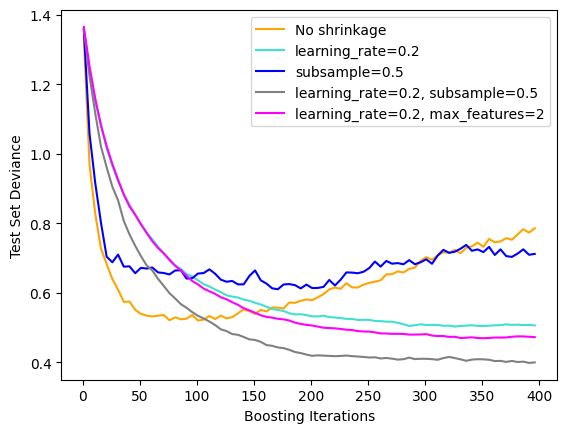

In [9]:
plt.figure()

for label, color, setting in [
    ("No shrinkage", "orange", {"learning_rate": 1.0, "subsample": 1.0}),
    ("learning_rate=0.2", "turquoise", {"learning_rate": 0.2, "subsample": 1.0}),
    ("subsample=0.5", "blue", {"learning_rate": 1.0, "subsample": 0.5}),
    (
        "learning_rate=0.2, subsample=0.5",
        "gray",
        {"learning_rate": 0.2, "subsample": 0.5},
    ),
    (
        "learning_rate=0.2, max_features=2",
        "magenta",
        {"learning_rate": 0.2, "max_features": 2},
    ),
]:
    params = dict(original_params)
    params.update(setting)

    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)

    for i, y_proba in enumerate(clf.staged_predict_proba(X_test)):
        test_deviance[i] = 2 * log_loss(y_test, y_proba[:, 1])

    plt.plot(
        (np.arange(test_deviance.shape[0]) + 1)[::5],
        test_deviance[::5],
        "-",
        color=color,
        label=label,
    )

plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Test Set Deviance")

plt.show()

# Summary

In this lab, we learned how to implement different regularization strategies for Gradient Boosting using scikit-learn. We used the binomial deviance loss function and the make_hastie_10_2 dataset. We implemented different regularization strategies such as no shrinkage, learning rate = 0.2, subsample = 0.5, and max features = 2. Finally, we plotted the test set deviance for each regularization strategy to compare their performance.